In [1]:
## import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#from keras.datasets import mnist
from sklearn.linear_model import SGDClassifier


In [2]:
## import MNIST data
#(X_train, y_train), (X_val, y_val) = mnist.load_data()

b = np.load('./data/mnist.npz')
## train and test data
X_train, y_train, X_val, y_val = b['x_train'], b['y_train'], b['x_test'], b['y_test']

Sahpe of training data :  (60000, 28, 28)
label ;  5


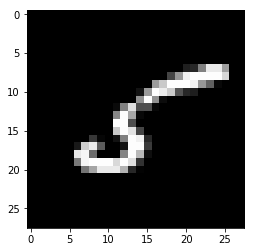

In [3]:
## data review
print("Sahpe of training data : ", X_train.shape)
i = 11
print("label ; ", y_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.show()

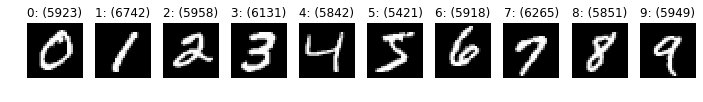

In [4]:
## Data Visualization
# Plot first image of each label
unique_labels = set(y_train)
plt.figure(figsize=(12, 12))

i = 1
for label in unique_labels:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
    i += 1
    _ = plt.imshow(image, cmap='gray')
plt.show()

In [5]:
## Feature Engineering
## Normalize data
X_train2 = X_train.astype('float32')/255.
X_val2 = X_val.astype('float32')/255.

## Flatten data - we threat the image as a sequential array of values (64 by 64) to 784
X_train3 = np.reshape(X_train2, (60000, 784))
X_val3 = np.reshape(X_val2, (10000, 784))

In [6]:
## Final Data shape
print(X_train.shape, X_val.shape)
print(X_train2.shape, X_val2.shape)
print(X_train3.shape, X_val3.shape)
print()
print(y_train.shape, y_val.shape)


(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)

(60000,) (10000,)


In [16]:
print(y_train[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [8]:
### Train the model
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train3, y_train)

C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
### Validate the accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_val3, y_val, cv=3, scoring="accuracy")  ### three folding validataion

C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: 

array([0.836429  , 0.8649865 , 0.87293482])

In [15]:
## Predict with the trained model
i= 1224

pred = sgd_clf.predict([X_val3[i]])
print("Actual data : ", y_val[i])
print("Predicted: ", pred)

Actual data :  2
Predicted:  [2]
